In [10]:
import pandas_datareader as pdr
import tensorflow as tf
import numpy as np
key="b3c0ac52a8591bdd6dc788fa9d252b4f2868b583"

In [8]:
df = pdr.get_data_tiingo('AAPL', api_key=key)
df.to_csv('AAPL.csv')
import pandas as pd
df=pd.read_csv('AAPL.csv')
df.head()

C:\Users\G Sujith Goud\anaconda3\lib\site-packages\pandas_datareader\tiingo.py:234: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  return pd.concat(dfs, self._concat_axis)


,symbol,date,close,high,low,open,volume,adjClose,adjHigh,adjLow,adjOpen,adjVolume,divCash,splitFactor
0,AAPL,2018-06-22 00:00:00+00:00,184.92,186.15,184.70,186.12,27200447,44.177146,44.470992,44.124589,44.463825,108801788,0.0,1.0
1,AAPL,2018-06-25 00:00:00+00:00,182.17,184.92,180.73,183.40,31663096,43.520175,44.177146,43.176161,43.814020,126652384,0.0,1.0
2,AAPL,2018-06-26 00:00:00+00:00,184.43,186.53,182.54,182.99,24569201,44.060086,44.561773,43.608567,43.716072,98276804,0.0,1.0
3,AAPL,2018-06-27 00:00:00+00:00,184.16,187.28,184.03,185.23,25285328,43.995583,44.740947,43.964526,44.251205,101141312,0.0,1.0
4,AAPL,2018-06-28 00:00:00+00:00,185.50,186.21,183.80,184.10,17365235,44.315707,44.485326,43.909580,43.981249,69460940,0.0,1.0


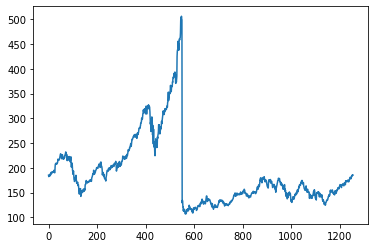

In [9]:
df1=df.reset_index()['close']
import matplotlib.pyplot as plt
plt.plot(df1)

In [11]:
from sklearn.preprocessing import MinMaxScaler
scaler=MinMaxScaler(feature_range=(0,1))
df1=scaler.fit_transform(np.array(df1).reshape(-1,1))
df1

array([[0.19556669],
       [0.18867877],
       [0.19433939],
       ...,
       [0.19829681],
       [0.19556669],
       [0.19579211]])

In [13]:
training_size=int(len(df1)*0.65)
test_size=len(df1)-training_size
train_data,test_data=df1[0:training_size,:],df1[training_size:len(df1),:1]
training_size,test_size

(816, 440)

In [16]:

def create_dataset(dataset, time_step=1):
	dataX, dataY = [], []
	for i in range(len(dataset)-time_step-1):
		a = dataset[i:(i+time_step), 0]   ###i=0, 0,1,2,3-----99   100 
		dataX.append(a)
		dataY.append(dataset[i + time_step, 0])
	return np.array(dataX), np.array(dataY)

In [19]:
time_step = 100
X_train, y_train = create_dataset(train_data, time_step)
X_test, ytest = create_dataset(test_data, time_step)
print(X_train.shape), print(y_train.shape)
print(X_test.shape), print(ytest.shape)

(715, 100)
(715,)
(339, 100)
(339,)


(None, None)

In [20]:
X_train =X_train.reshape(X_train.shape[0],X_train.shape[1] , 1)
X_test = X_test.reshape(X_test.shape[0],X_test.shape[1] , 1)

In [21]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import LSTM

In [23]:
model=Sequential()
model.add(LSTM(50,return_sequences=True,input_shape=(100,1)))
model.add(LSTM(50,return_sequences=True))
model.add(LSTM(50))
model.add(Dense(1))
model.compile(loss='mean_squared_error',optimizer='adam')
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_3 (LSTM)               (None, 100, 50)           10400     
                                                                 
 lstm_4 (LSTM)               (None, 100, 50)           20200     
                                                                 
 lstm_5 (LSTM)               (None, 50)                20200     
                                                                 
 dense_1 (Dense)             (None, 1)                 51        
                                                                 
Total params: 50,851
Trainable params: 50,851
Non-trainable params: 0
_________________________________________________________________


In [24]:
model.fit(X_train,y_train,validation_data=(X_test,ytest),epochs=100,batch_size=64,verbose=1)

Epoch 1/100
12/12 [==============================] - 25s 856ms/step - loss: 0.0339 - val_loss: 0.0014
Epoch 2/100
12/12 [==============================] - 6s 518ms/step - loss: 0.0129 - val_loss: 0.0016
Epoch 3/100
12/12 [==============================] - 7s 550ms/step - loss: 0.0111 - val_loss: 5.1815e-04
Epoch 4/100
12/12 [==============================] - 7s 549ms/step - loss: 0.0100 - val_loss: 0.0020
Epoch 5/100
12/12 [==============================] - 6s 513ms/step - loss: 0.0088 - val_loss: 3.7975e-04
Epoch 6/100
12/12 [==============================] - 6s 503ms/step - loss: 0.0074 - val_loss: 3.0144e-04
Epoch 7/100
12/12 [==============================] - 6s 492ms/step - loss: 0.0069 - val_loss: 3.7621e-04
Epoch 8/100
12/12 [==============================] - 6s 489ms/step - loss: 0.0061 - val_loss: 6.2685e-04
Epoch 9/100
12/12 [==============================] - 6s 491ms/step - loss: 0.0057 - val_loss: 6.9773e-04
Epoch 10/100
12/12 [==============================] - 6s 485ms/ste

In [25]:
train_predict=model.predict(X_train)
test_predict=model.predict(X_test)

11/11 [==============================] - 0s 25ms/step


In [26]:
train_predict=scaler.inverse_transform(train_predict)
test_predict=scaler.inverse_transform(test_predict)

In [27]:
import math
from sklearn.metrics import mean_squared_error
math.sqrt(mean_squared_error(y_train,train_predict))

222.92845492006484

In [28]:
math.sqrt(mean_squared_error(ytest,test_predict))

154.24565691525365

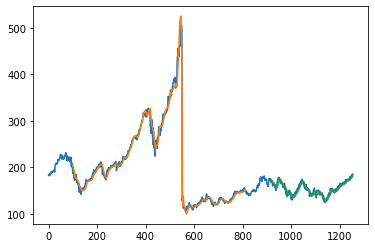

In [30]:
look_back=100
trainPredictPlot = np.empty_like(df1)
trainPredictPlot[:, :] = np.nan
trainPredictPlot[look_back:len(train_predict)+look_back, :] = train_predict
# shift test predictions for plotting
testPredictPlot = np.empty_like(df1)
testPredictPlot[:, :] = np.nan
testPredictPlot[len(train_predict)+(look_back*2)+1:len(df1)-1, :] = test_predict
# plot baseline and predictions
plt.plot(scaler.inverse_transform(df1))
plt.plot(trainPredictPlot)
plt.plot(testPredictPlot)
plt.show()

In [35]:
x_input=test_data[341:].reshape(1,-1)
x_input.shape


(1, 99)

In [ ]:
temp_input=list(x_input)
temp_input=temp_input[0].tolist()

In [37]:
from numpy import array

lst_output=[]
n_steps=100
i=0
while(i<30):
    
    if(len(temp_input)>100):
        #print(temp_input)
        x_input=np.array(temp_input[1:])
        print("{} day input {}".format(i,x_input))
        x_input=x_input.reshape(1,-1)
        x_input = x_input.reshape((1, n_steps, 1))
        #print(x_input)
        yhat = model.predict(x_input, verbose=0)
        print("{} day output {}".format(i,yhat))
        temp_input.extend(yhat[0].tolist())
        temp_input=temp_input[1:]
        #print(temp_input)
        lst_output.extend(yhat.tolist())
        i=i+1
    else:
        x_input = x_input.reshape((1, n_steps,1))
        yhat = model.predict(x_input, verbose=0)
        print(yhat[0])
        temp_input.extend(yhat[0].tolist())
        print(len(temp_input))
        lst_output.extend(yhat.tolist())
        i=i+1
    

print(lst_output)

0 day input [0.09056982 0.09380088 0.09665623 0.11015654 0.11937383 0.11243582
 0.11974953 0.11291171 0.11028178 0.11063244 0.11774577 0.11611772
 0.12145272 0.11739512 0.11448967 0.10429555 0.10537257 0.10659987
 0.09986224 0.10289292 0.10161553 0.09635567 0.09785848 0.11068253
 0.11769568 0.11211021 0.11529117 0.10958046 0.10434565 0.1092799
 0.11458986 0.11559173 0.12275517 0.12062617 0.12663745 0.13134627
 0.12771446 0.13046963 0.13377583 0.12884158 0.12726362 0.13507827
 0.13906074 0.14542267 0.14860363 0.1472511  0.14256731 0.14482154
 0.13823419 0.13515341 0.13340013 0.14707577 0.14619912 0.14624922
 0.14935504 0.15226049 0.14980589 0.14572323 0.14649969 0.14259236
 0.14256731 0.15421415 0.15739512 0.15716969 0.15453976 0.15180964
 0.14765185 0.16713838 0.16696306 0.16262993 0.16710081 0.16758923
 0.16463369 0.16338134 0.16338134 0.16493425 0.17084534 0.17112085
 0.16871634 0.16210394 0.16280526 0.16568566 0.17179712 0.1764809
 0.17635567 0.183469   0.18562304 0.18219161 0.18126

In [47]:
day_new=np.arange(1,101)
day_pred=np.arange(101,131)
len(df1)

1256

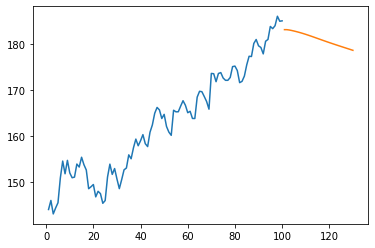

In [48]:
plt.plot(day_new,scaler.inverse_transform(df1[1156:]))
plt.plot(day_pred,scaler.inverse_transform(lst_output))

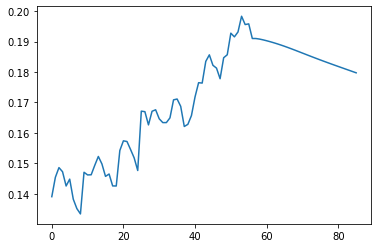

In [45]:
df3=df1.tolist()
df3.extend(lst_output)
plt.plot(df3[1200:])

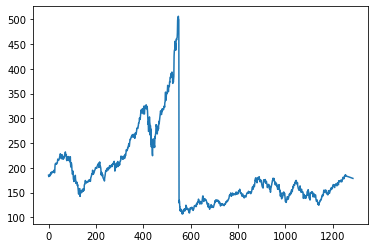

In [46]:
df3=scaler.inverse_transform(df3).tolist()
plt.plot(df3)